## Using statistics to find the best markets for advertisements
In this project I work for an an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but the company also cover many other domains, like data science, game development, etc.

The goal of this project is to find the two best markets to advertise an e-learning product in.

After a statiscal exploration of the dataset I have identified that:

* US programmers are in majority of attending and paying for courses. On average US students are willing to pay on average around \$143.
* Canada is coming in as the second possible market based on the average price paid by students (\$93). However the relative number of potential customers is quite low (around 6%) while there is twice as many programmers (relatively) from India that are willing to pay on average \$66.

In conclusion it is obvious that there should be allocated about 50% of the budget for advertising in the US while it might make sense to split the advertisement for the second market into 25% for Canada and 25% for India and do a follow up to see which market responds best in respect to the advertisements.

In [33]:
# Importing nessecary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## How to find relevant data
To avoid spending money on organizing a survey, I will first make use of existing data to determine whether we can reach any reliable results.

One good candidate for our purpose is freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository here:
https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv

In [2]:
# Load and explore data
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Is the sample representative?
In the following I explore the dataset further to determine if the sample that we have is representative for our population of interest.

Specifically I will analyse the table column 'JobRoleInterest' with respect to the following questions:
* Are people interested in only one subject or they can be interested in more than one subject?   
* If most people are interested in more than one subject, is this sample still representative?   
* The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?   


In [35]:
# 'JobRoleInterest' contain strings with multiple job names that I will split here.
interests_no_nulls = fcc['JobRoleInterest'].dropna()
stripped_interests = interests_no_nulls.str.replace(' ','')
splitted_interests = stripped_interests.str.split(',')

# Creating a frequency table for the variable describing the number of options
print('True: Percentage of people interested in multiple subjects.\nFalse: Percentage of people interested in a single subject.')
n_of_options = splitted_interests.apply(lambda x: True if len(x)>1 else False) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

True: Percentage of people interested in multiple subjects.
False: Percentage of people interested in a single subject.


False    31.650458
True     68.349542
Name: JobRoleInterest, dtype: float64

In [36]:
# Isolating people interested in web or mobile development
web_or_mobile = stripped_interests.str.contains('Web|Mobile')
freq_table = web_or_mobile.value_counts(normalize = True).sort_index() * 100

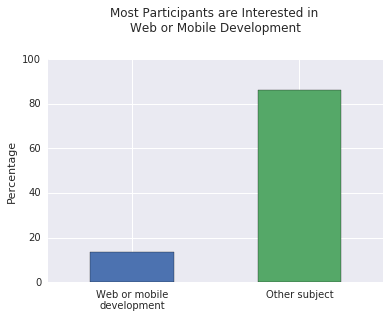

In [39]:
# Bar plot of participants interested in web / mobile development
freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development', y = 1.1)
plt.ylabel('Percentage')
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

## People are interested in multiple subjects
From the exploration above I find that:

* 68% are interested in multiple subjects.   
* As people are interested in multiple subjects this sample is still representative of the population relevant for marketing the e-learning platform.   
* About 14% of the sample is interested in web or mobile development.

Next I will analyse the data further to identify relevant markets for advertisement.

In [6]:
# Isolate the participants that answered what role they'd be interested in
fcc_not_null = fcc[fcc['JobRoleInterest'].notnull()].copy()

In [41]:
# Top 5 relative frequency table with countries of interest
relative_freq = fcc_not_null['CountryLive'].value_counts(normalize = True) * 100
print('Country | Frequency (Percentage)')
print(relative_freq.head(5))

Country | Frequency (Percentage)
United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64


In [42]:
# Top 5 absolute frequency table with countries of interest
abs_freq = fcc_not_null['CountryLive'].value_counts()
abs_freq.head(5)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

## Zeroing in on relevant markets
Based on the preliminary results it looks like there is an opportunity in the following markets: US, India, UK, Canada, Poland.

I now need to figure out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The e-learning company sells subscriptions at a price of $59 and for this reason I need to find out how much money each student spends per month.

Since the courses are in English, I choose to focus my final analysis on US, India, UK and Canada where English is a native or common language. According to a quick research somewhere between 12% to 30% speak English in India which means that up to about 400 million people in India will understand the course content.

In [43]:
# Remove null country elements and isolate the four countries of interest
fcc_not_null = fcc_not_null[fcc_not_null['CountryLive'].notnull()]
fcc_markets = fcc_not_null[fcc_not_null['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')].copy()

In [44]:
# To avoid dividing by 0 (months learning) I will replace all the values of 0 with 1 (month).
fcc_markets['MonthsProgramming'].replace(0,1, inplace = True)

# Create new column with information on student paid price per month
fcc_markets['MoneyPerMonth'] = fcc_markets['MoneyForLearning'] / fcc_markets['MonthsProgramming']

In [11]:
# Identify null elements in the MoneyPerMonth and remove them
fcc_markets['MoneyPerMonth'].isnull().sum()
fcc_markets = fcc_markets[fcc_markets['MoneyPerMonth'].notnull()]

In [45]:
# Calculate mean price per country
countries_mean = fcc_markets.groupby('CountryLive').mean()

print(countries_mean['MoneyPerMonth'])

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: MoneyPerMonth, dtype: float64


## Observations and further analysis
The results for the UK and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

To investigate this further it will be fruitful to utilize boxplots to identify possible outliers in the data.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



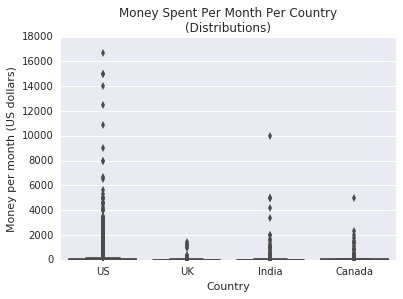

In [46]:
# Isolate only those participants who spend less than $20.000 per month
fcc_markets = fcc_markets[fcc_markets['MoneyPerMonth'] < 20000] # cutoff found from temporary plot

# Setting up boxplot
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = fcc_markets)
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [21]:
# Examine outliers from US
us_outliers = fcc_markets[
    (fcc_markets['CountryLive'] == 'United States of America') & 
    (fcc_markets['MoneyPerMonth'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. 

The data also shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp or tuition fee that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower.

As a consequence, in the next code block, I will remove respondents that:

* Didn't attend bootcamps.   
* Had been programming for three months or less when at the time they completed the survey.   

In [47]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = fcc_markets[
    (fcc_markets['CountryLive'] == 'United States of America') & 
    (fcc_markets['MoneyPerMonth'] >= 6000) &
    (fcc_markets['AttendedBootcamp'] == 0)
]

fcc_markets = fcc_markets.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = fcc_markets[
    (fcc_markets['CountryLive'] == 'United States of America') & 
    (fcc_markets['MoneyPerMonth'] >= 6000) &
    (fcc_markets['MonthsProgramming'] <= 3)
]

fcc_markets = fcc_markets.drop(less_than_3_months.index)

In [48]:
# Examine outliers from India
india_outliers = fcc_markets[
    (fcc_markets['CountryLive'] == 'India') & 
    (fcc_markets['MoneyPerMonth'] >= 2500)]

india_outliers['MonthsProgramming']

1728      4.0
1755     15.0
7989      1.0
8126      1.0
13398     2.0
15587    24.0
Name: MonthsProgramming, dtype: float64

It seems that neither participant attended a bootcamp. The data also shows that four attendents have only been programming for four months or less. It is therefore really hard to figure out from the data whether these persons spent that much money with learning.

The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included.

It therefore seems safer to remove these outliers.

In [49]:
# Remove the outliers for India
fcc_markets = fcc_markets.drop(india_outliers.index)

In [50]:
# Examine outliers from Canada
canada_outliers = fcc_markets[
    (fcc_markets['CountryLive'] == 'Canada') & 
    (fcc_markets['MoneyPerMonth'] >= 4000)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents.

This participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp.

I will therefore take the same approach here as for the US and remove this outlier.

In [51]:
# Remove the outlier for Canada
fcc_markets = fcc_markets.drop(canada_outliers.index)

In [52]:
# Recompute and regroup mean sum of money spent by students each month
countries_mean = fcc_markets.groupby('CountryLive').mean()

print(countries_mean['MoneyPerMonth'])

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



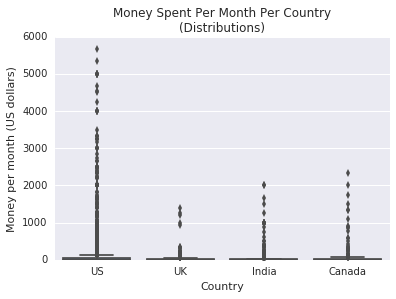

In [53]:
# Setting up boxplot
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = fcc_markets)
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [54]:
# Frequency table for the 'CountryLive' column
fcc_markets['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

## Conclusions and recommendations for advertising in new markets
After a statiscal exploration of the dataset I have identified that

* US programmers are in majority of attending and paying for courses. On average about \$143.
* Canada is coming in as the second possible market based on average price paid by students (\$93). However the relative number of programmers is quite low (around 6%) while programmers from India are willing to pay on average \$66 and seems to be relatively higher represented in the statistics (12% respondents).

In conclusion it is obvious that there should be allocated about 50% of the budget for advertising in the US while it might make sense to split the advertisement for the second market into 25% for Canada and 25% for India and do a follow up to see which market responds best to the advertisements.